In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d


In [2]:
# raw data
df = pd.read_csv('Fires.csv')

C:\Users\afu45\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# preview of rows
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [33]:
# all column headers
# list(df.columns)

In [34]:
# keep the necessary/interesting columns 
data = df[['FOD_ID',
           'FPA_ID',
           'FIRE_CODE',
           'FIRE_NAME',
           'FIRE_YEAR',
           'DISCOVERY_DATE',
           'DISCOVERY_DOY',
           'DISCOVERY_TIME',
           'STAT_CAUSE_CODE',
           'STAT_CAUSE_DESCR',
           'CONT_DATE',
           'CONT_DOY',
           'CONT_TIME',
           'FIRE_SIZE',
           'FIRE_SIZE_CLASS',
           'LATITUDE',
           'LONGITUDE',
           'STATE',
           'COUNTY']]

In [157]:
# clean data preview!
data.tail(20000)

,FOD_ID,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,CAUSE,COLOR
1860465,300295131,HIWMO-KA146,NaN,NaN,2010,2455490.5,294,NaN,13.0,Missing/Undefined,...,NaN,NaN,20.00,C,21.889719,-159.450272,HI,Kauai,Other,gray
1860466,300295132,HIWMO-KA549,NaN,NaN,2011,2455791.5,230,NaN,13.0,Missing/Undefined,...,NaN,NaN,0.01,A,21.880556,-159.449112,HI,Kauai,Other,gray
1860467,300295133,HIWMO-KA548,NaN,NaN,2011,2455790.5,229,NaN,13.0,Missing/Undefined,...,NaN,NaN,50.00,C,21.880556,-159.449112,HI,Kauai,Other,gray
1860468,300295134,HIWMO-KA147,NaN,NaN,2006,2453934.5,199,NaN,13.0,Missing/Undefined,...,NaN,NaN,15.00,C,21.899008,-159.448807,HI,Kauai,Other,gray
1860469,300295135,HIWMO-KA148,NaN,NaN,2006,2453921.5,186,NaN,13.0,Missing/Undefined,...,NaN,NaN,0.10,A,21.899494,-159.448791,HI,Kauai,Other,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,2015CAIRS29019636,NaN,ODESSA 2,2015,2457291.5,269,1726.0,13.0,Missing/Undefined,...,269.0,1843.0,0.01,A,40.481637,-122.389375,CA,NaN,Other,gray
1880461,300348373,2015CAIRS29217935,NaN,NaN,2015,2457300.5,278,126.0,9.0,Miscellaneous,...,NaN,NaN,0.20,A,37.617619,-120.938570,CA,NaN,Other,gray
1880462,300348375,2015CAIRS28364460,NaN,NaN,2015,2457144.5,122,2052.0,13.0,Missing/Undefined,...,NaN,NaN,0.10,A,37.617619,-120.938570,CA,NaN,Other,gray
1880463,300348377,2015CAIRS29218079,NaN,NaN,2015,2457309.5,287,2309.0,13.0,Missing/Undefined,...,NaN,NaN,2.00,B,37.672235,-120.898356,CA,NaN,Other,gray


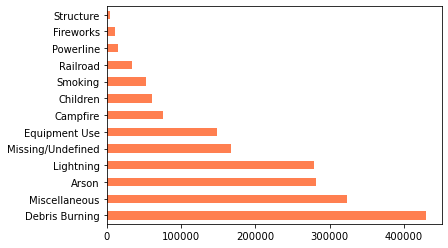

In [180]:
# most common fire start causes
data['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()

In [ ]:
# data['STAT_CAUSE_CODE'].value_counts().head(n=10).plot(kind='barh',color='coral')
# data['STAT_CAUSE_DESCR'].value_counts().head(n=10).plot(kind='barh',color='coral')
# plt.show()
targets = data.STAT_CAUSE_DESCR.unique().tolist()

In [159]:
# eventually want duration ????
# just numerical values

test = data[['DISCOVERY_DOY',
        'DISCOVERY_TIME',
        'STAT_CAUSE_CODE',
        'STAT_CAUSE_DESCR',
        'CAUSE',
        'FIRE_SIZE',
        'LATITUDE',
        'LONGITUDE',
        'STATE',
        #'MONTH'
        ]]

# convert state to numerical value
le = preprocessing.LabelEncoder()
test['STATE'] = le.fit_transform(test['STATE'])

# drop rows with at least one missing value
test = test.dropna()

<ipython-input-159-5049558f7612>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['STATE'] = le.fit_transform(test['STATE'])


In [174]:
np.where(test['STAT_CAUSE_CODE'] == 10.0)

(array([173894, 173895, 174245, ..., 984846, 984847, 984848], dtype=int64),)

In [175]:
test.head(173895)

,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CAUSE,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
0,33,1300.0,9.0,Miscellaneous,Other,0.10,40.036944,-121.005833,4
1,133,845.0,1.0,Lightning,Natural,0.25,38.933056,-120.404444,4
2,152,1921.0,5.0,Debris Burning,Natural,0.10,38.984167,-120.735556,4
3,180,1600.0,1.0,Lightning,Natural,0.10,38.559167,-119.913333,4
4,180,1600.0,1.0,Lightning,Natural,0.10,38.559167,-119.933056,4
...,...,...,...,...,...,...,...,...,...
173892,118,1640.0,7.0,Arson,Malicious,5.00,34.600100,-95.166900,36
173893,118,1640.0,7.0,Arson,Malicious,2.00,34.600100,-95.000200,36
173894,118,1640.0,7.0,Arson,Malicious,5.00,34.600100,-95.166900,36
173895,175,1900.0,8.0,Children,Accidental,4.00,47.977500,-102.233800,28


In [37]:
def plot_corr(test,size=10):
    corr = test.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    
# plot_corr(test)

In [64]:
# PCA FUNNNNNN

features = ['DISCOVERY_DOY',
        'DISCOVERY_TIME',
        #'STAT_CAUSE_CODE', this is our y
        'FIRE_SIZE',
        'LATITUDE',
        'LONGITUDE',
        'STATE',
        #'MONTH'
        ]

# Separating out the features
x = test.loc[:, features].values

# Separating out the target
# y = test.loc[:,['STAT_CAUSE_CODE']].values
y = test.loc[:,['CAUSE']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Change STAT_CAUSE_CODE to categorical bc ??? why not
#test['STAT_CAUSE_CODE']=pd.Categorical(test['STAT_CAUSE_CODE'])
#my_color=test['STAT_CAUSE_CODE'].cat.codes

# targets = my_color.unique().tolist()
# targets = data.STAT_CAUSE_DESCR.unique().tolist()

In [107]:
# targets = data.STAT_CAUSE_CODE.unique().tolist()
# targets


In [24]:
data['STAT_CAUSE_DESCR'].unique()

# Other:'Miscellaneous', 'Missing/Undefined'
# Natural: 'Lightning', 'Debris Burning'
# Accidental: 'Campfire', 'Children', 'Fireworks','Smoking'
# Infrastructure: 'Railroad', 'Structure', 'Powerline', 'Equipment Use'
# Malicious: 'Arson'

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Children', 'Railroad', 'Smoking',
       'Powerline', 'Structure', 'Fireworks', 'Missing/Undefined'],
      dtype=object)

In [79]:
def label_cause (row):
    if row['STAT_CAUSE_DESCR'] == 'Lightning' :
        return 'Natural'
    elif row['STAT_CAUSE_DESCR'] == 'Debris Burning' :
        return 'Natural'
    elif row['STAT_CAUSE_DESCR'] == 'Campfire' :
        return 'Accidental'
    elif row['STAT_CAUSE_DESCR'] == 'Children' :
        return 'Accidental'
    elif row['STAT_CAUSE_DESCR'] == 'Fireworks' :
        return 'Accidental'
    elif row['STAT_CAUSE_DESCR'] == 'Smoking' :
        return 'Accidental'
    elif row['STAT_CAUSE_DESCR'] == 'Railroad' :
        return 'Infrastructure'
    elif row['STAT_CAUSE_DESCR'] == 'Structure' :
        return 'Infrastructure'
    elif row['STAT_CAUSE_DESCR'] == 'Powerline' :
        return 'Infrastructure'
    elif row['STAT_CAUSE_DESCR'] == 'Equipment Use' :
        return 'Infrastructure'
    elif row['STAT_CAUSE_DESCR'] == 'Arson' :
        return 'Malicious'
    return 'Other'

In [80]:
data['CAUSE'] = data.apply(lambda row: label_cause(row), axis=1)

<ipython-input-80-6ac2e3386609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CAUSE'] = data.apply(lambda row: label_cause(row), axis=1)


In [103]:
def label_color(row):
    if row['CAUSE'] == 'Natural':
        return 'g'
    elif row['CAUSE'] == 'Accidental':
        return 'b'
    elif row['CAUSE'] == 'Infrastructure':
        return 'c'
    elif row['CAUSE'] == 'Malicious':
        return 'r'
    else:
        return 'gray'

In [104]:
data['COLOR'] = data.apply(lambda row: label_color(row), axis=1)

<ipython-input-104-7950aafb6cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COLOR'] = data.apply(lambda row: label_color(row), axis=1)


In [20]:
# PCA with 3 components

pca1 = PCA(n_components=3)
principalComponents1 = pca1.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['PCA0', 'PCA1', 'PCA2'])

In [178]:
principalDf1['PCA0']

0         0.023217
1         0.479151
2         0.457574
3         0.574583
4         0.575282
            ...   
997822    1.342790
997823    1.229873
997824    0.131984
997825    0.995567
997826   -0.664814
Name: PCA0, Length: 997827, dtype: float64

No handles with labels found to put in legend.


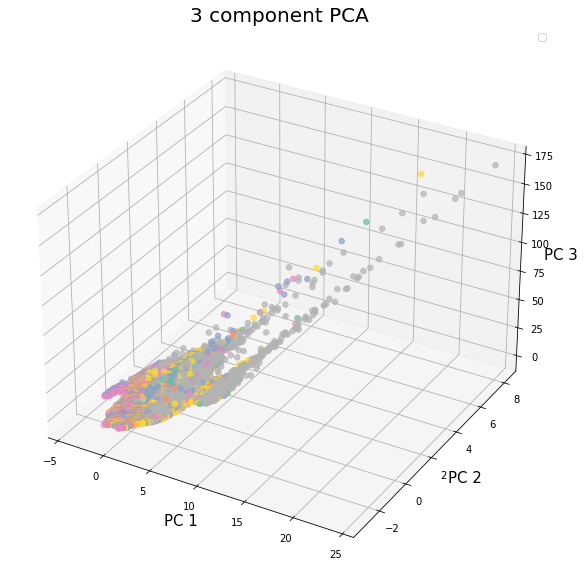

In [177]:
# Plot initialisation for 3 component PCA

fig = plt.figure(figsize = (10,10))
#ax = plt.axes(projection='3d')
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

# Store results of PCA in a data frame
#result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
ax.scatter(principalDf1['PCA0'], principalDf1['PCA1'], principalDf1['PCA2'], c=my_color, cmap="Set2_r", s=30, alpha = 0.7)

ax.legend(targets)
ax.grid()

In [134]:
cause_code = test.loc[:,['STAT_CAUSE_CODE']].values
targets = np.array([cause[0].astype(int) for cause in cause_code])

In [135]:
#np.hstack((principalComponents2[0],principalComponents2[1]))
targets = targets[:, None]


In [138]:
final = np.hstack((principalComponents2,targets))
final

array([[ 0.02321737,  1.00626918,  9.        ],
       [ 0.47915089,  1.71435716,  1.        ],
       [ 0.45757412,  0.94565753,  5.        ],
       ...,
       [ 0.13198373,  0.83564966, 13.        ],
       [ 0.99556652,  1.14012376, 13.        ],
       [-0.66481364,  0.71745442,  9.        ]])

In [44]:
# PCA with 2 Components

pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['PCA0', 'PCA1'])

In [83]:
finalDf2 = pd.concat([principalDf2, test['CAUSE']], axis = 1)
finalDf2.head()

,PCA0,PCA1,CAUSE
0,0.023217,1.006269,Other
1,0.479151,1.714357,Natural
2,0.457574,0.945658,Natural
3,0.574583,1.284183,Natural
4,0.575282,1.284671,Natural


In [99]:
# d = (principalDf2['PCA0'], principalDf2['PCA1'])
# targets = data.STAT_CAUSE_DESCR.unique().tolist()

array([0.5745828 , 1.28418329])

In [108]:
y

'A'

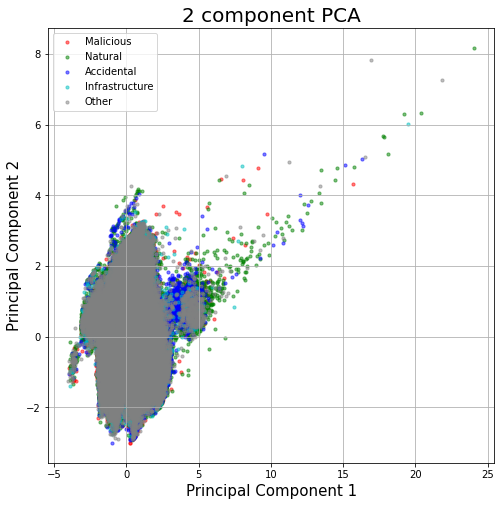

In [102]:
# targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#causes = test.CAUSE.unique().tolist()
causes = ['Malicious', 'Natural', 'Accidental', 'Infrastructure', 'Other']
colors = ['r', 'g', 'b', 'c', 'gray']
for cause, color in zip(causes,colors):
    indicesToKeep = finalDf2['CAUSE'] == cause
    ax.scatter(finalDf2.loc[indicesToKeep, 'PCA0']
               , finalDf2.loc[indicesToKeep, 'PCA1']
               , c = color
               , s = 10
               , alpha = 0.5)


ax.legend(causes)
ax.grid()


In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)

ax.scatter(principalDf2['PCA0'], principalDf2['PCA1'], c=my_color, cmap="Set2_r", s=30, alpha=0.5)

In [ ]:
fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)

# for i in range(df2.shape[0]):
#     ax.scatter(df2[i][0], df2[i][1], c=cdict[df2[i][2]], s=40, label=labl[df2[i][2]])
    
# ax.legend()
# ax.grid()


In [ ]:
df2 = np.hstack((principalComponents2, targets))

In [ ]:
# cdict={1:'yellow',2:'salmon',3:'tan',4:'orange',5:'maroon',6:'grey',7:'red',8:'orchid',9:'lightblue',10:'palegreen',11:'royalblue',12:'lavender',13:'plum'}
# labl={1:'Lightning',2:'Equipment Use',3:'Smoking',4:'Campfire',5:'Debris Burning',6:'Railroad',7:'Arson',8:'Children',9:'Misc',10:'Fireworks',11:'Powerline',12:'Structure',13:'Missing/Undefined'}